In [ ]:
# Data Analysis Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import datetime as dt

# Libraries for Feature Processing
from sklearn.preprocessing import StandardScaler, Normalizer,OneHotEncoder

# Other utilities
import warnings
warnings.filterwarnings(action='ignore')


In [ ]:
# READ THE DATA
chips =pd.read_csv('/content/chip_dataset (2).csv')
chips.head(1)

,Unnamed: 0,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
0,0,AMD Athlon 64 3500+,CPU,2007-02-20,65.0,45.0,77.0,122.0,2200.0,Unknown,AMD,NaN,NaN,NaN


In [ ]:
chips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4854 entries, 0 to 4853
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             4854 non-null   int64  
 1   Product                4854 non-null   object 
 2   Type                   4854 non-null   object 
 3   Release Date           4854 non-null   object 
 4   Process Size (nm)      4845 non-null   float64
 5   TDP (W)                4228 non-null   float64
 6   Die Size (mm^2)        4139 non-null   float64
 7   Transistors (million)  4143 non-null   float64
 8   Freq (MHz)             4854 non-null   float64
 9   Foundry                4854 non-null   object 
 10  Vendor                 4854 non-null   object 
 11  FP16 GFLOPS            536 non-null    float64
 12  FP32 GFLOPS            1948 non-null   float64
 13  FP64 GFLOPS            1306 non-null   float64
dtypes: float64(8), int64(1), object(5)
memory usage: 531.0+ 

Insights from Basic Data Analysis
1. We have missing data
2,Release Date is an object instead of a Date Time Dt
3.How do we handle this missing data?
4. we have categorical and numerical variables

In [ ]:
chips.describe()

,Unnamed: 0,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
count,4854.000000,4845.000000,4228.000000,4139.000000,4143.000000,4854.000000,536.000000,1948.000000,1306.000000
mean,2426.500000,55.109598,81.359981,188.440445,1929.922279,1484.406057,8397.459851,2134.756653,363.670511
std,1401.373433,44.998676,76.807808,126.189383,4044.891098,1066.701523,13799.551131,3898.431487,1145.931856
min,0.000000,0.000000,1.000000,1.000000,8.000000,100.000000,10.020000,12.800000,3.600000
25%,1213.250000,22.000000,33.000000,104.000000,154.000000,590.000000,768.800000,257.300000,38.295000
50%,2426.500000,40.000000,65.000000,148.000000,624.000000,1073.500000,2965.500000,696.000000,89.280000
75%,3639.750000,90.000000,100.000000,239.000000,1550.000000,2400.000000,10600.000000,2116.750000,220.000000
max,4853.000000,250.000000,900.000000,826.000000,54200.000000,4700.000000,184600.000000,40000.000000,11540.000000


##Insights
We have presence of outliers in our numerical variables and as such need to deal with them before we can model

In [ ]:
# Drop non-consequntial fields
chips.drop(['Unnamed: 0'], axis=1, inplace=True)

Text(0.5, 1.0, 'Missing Values Heatmap')

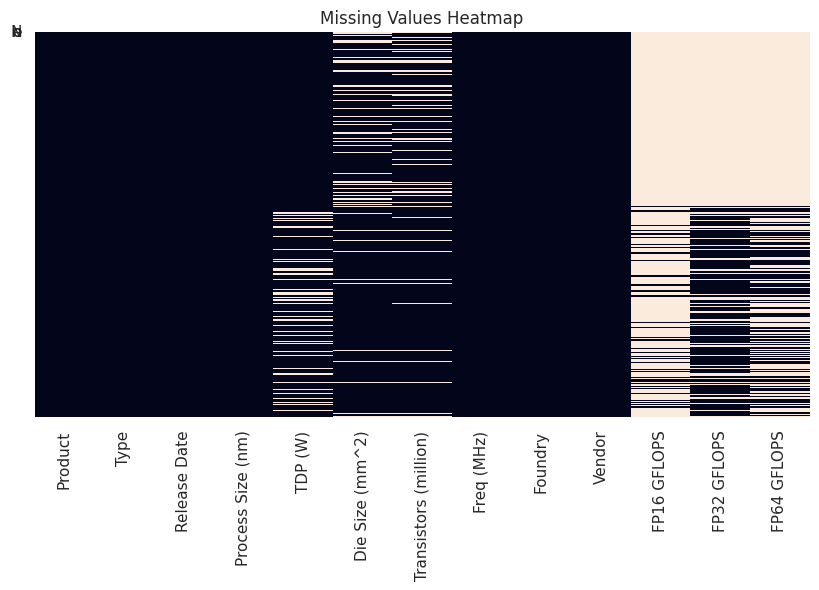

In [ ]:
# Explore missingness
plt.figure(figsize=(10,5))

sns.heatmap(chips.isnull(), yticklabels="None", cbar=False)
plt.title("Missing Values Heatmap")



##Insights/Deductions

1. We have some missingness in our variables

2. Drop columns with more than 50% missing
3. Numerical values impute with median because of the presence of outliers
4. Categorical impute with mode

In [ ]:
#seperate the numerical and categorial variables
cat_var=chips.select_dtypes(include=[object])
cat_var.head(1)

,Product,Type,Release Date,Foundry,Vendor
0,AMD Athlon 64 3500+,CPU,2007-02-20,Unknown,AMD


In [ ]:
num_var = chips.select_dtypes(include=['float','int'])


In [ ]:
num_var.head(1)

,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
0,65.0,45.0,77.0,122.0,2200.0,NaN,NaN,NaN


In [ ]:
#impute with median for numerical,mode for categorical

fill = dict()

for i in range(len(chips.columns)):

    if chips.columns[i] in num_var:
        fill[chips.columns[i]] = chips[chips.columns[i]].median()

    else:
        fill[chips.columns[i]] = str(chips[chips.columns[i]].mode()).split()[1]

print(len(fill))
chips = chips.fillna(value=fill)

13


In [ ]:
chips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4854 entries, 0 to 4853
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Product                4854 non-null   object 
 1   Type                   4854 non-null   object 
 2   Release Date           4854 non-null   object 
 3   Process Size (nm)      4854 non-null   float64
 4   TDP (W)                4854 non-null   float64
 5   Die Size (mm^2)        4854 non-null   float64
 6   Transistors (million)  4854 non-null   float64
 7   Freq (MHz)             4854 non-null   float64
 8   Foundry                4854 non-null   object 
 9   Vendor                 4854 non-null   object 
 10  FP16 GFLOPS            4854 non-null   float64
 11  FP32 GFLOPS            4854 non-null   float64
 12  FP64 GFLOPS            4854 non-null   float64
dtypes: float64(8), object(5)
memory usage: 493.1+ KB


In [ ]:
#change Release date to a date time datatype from object
chips['Release Date'] = pd.to_datetime(chips['Release Date'],errors="coerce")


In [ ]:
chips['Year'] = chips['Release Date'].dt.year.astype('Int64')
chips.Year

0       2007
1       2018
2       2020
3       2013
4       2011
        ... 
4849    2011
4850    2005
4851    2010
4852    2003
4853    2008
Name: Year, Length: 4854, dtype: Int64

In [ ]:
chips.dtypes

Product                          object
Type                             object
Release Date             datetime64[ns]
Process Size (nm)               float64
TDP (W)                         float64
Die Size (mm^2)                 float64
Transistors (million)           float64
Freq (MHz)                      float64
Foundry                          object
Vendor                           object
FP16 GFLOPS                     float64
FP32 GFLOPS                     float64
FP64 GFLOPS                     float64
Year                              Int64
dtype: object

In [ ]:
chips.head(1)

,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
0,AMD Athlon 64 3500+,CPU,2007-02-20,65.0,45.0,77.0,122.0,2200.0,Unknown,AMD,2965.5,696.0,89.28


EDA.
1,Moore's Law still holds, especially in GPUs. (he number of transistors in a dense integrated circuit (IC) doubles about every two years.)

In [ ]:
CPU=chips.groupby('Type')['Transistors (million)',].value_counts(ascending=True)

In [ ]:
CPU

Type  Transistors (million)
CPU   2300.0                     1
      420.0                      1
      243.0                      1
      1800.0                     1
      463.0                      1
                              ... 
GPU   107.0                     49
      3540.0                    51
      292.0                     54
      585.0                     54
      624.0                    197
Name: count, Length: 218, dtype: int64

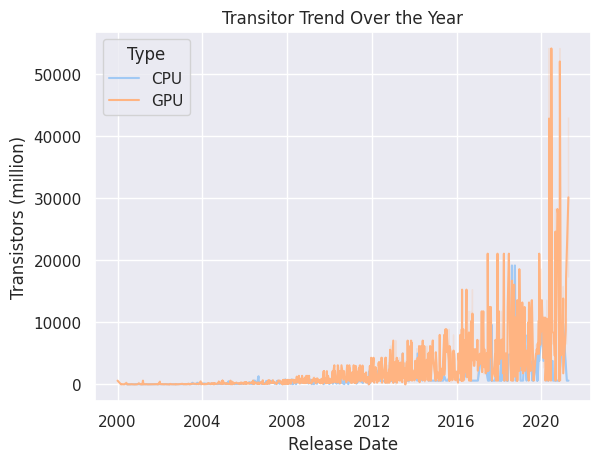

In [ ]:
fig = figsize=(14, 8)

sns.set_theme(style="darkgrid")
sns.lineplot(x='Release Date',y='Transistors (million)',palette='pastel',hue='Type', data=chips)

plt.title('Transitor Trend Over the Year')
plt.show()

In [ ]:
print(chips.columns)

Index(['Type', 'Release Date', 'Process Size (nm)', 'TDP (W)',
       'Die Size (mm^2)', 'Transistors (million)', 'Freq (GHz)', 'Vendor',
       'FP16 GFLOPS', 'FP32 GFLOPS', 'FP64 GFLOPS'],
      dtype='object')


CPUs have higher frequencies, but GPUs are catching up.

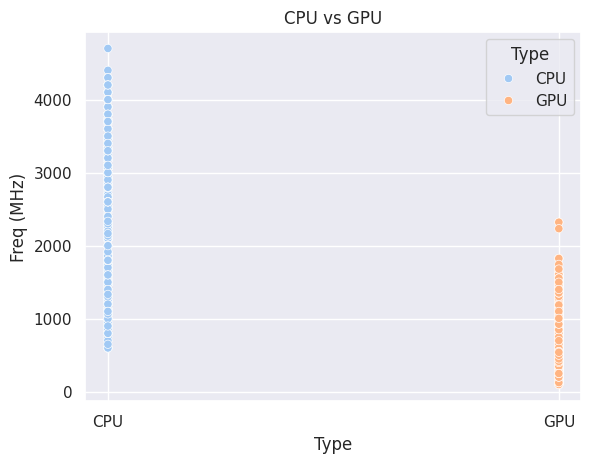

In [ ]:
fig = figsize=(14, 8)

sns.set_theme(style="darkgrid")
sns.scatterplot(x='Type',y='Freq (MHz)',palette='pastel',hue='Type', data=chips)

plt.title('CPU vs GPU')
plt.show()

##Plots for
1) CPUs have higher frequencies, but GPUs are catching up.

2)GPU performance doubles every 1.5 years.

3)Compare Number of transistors against year

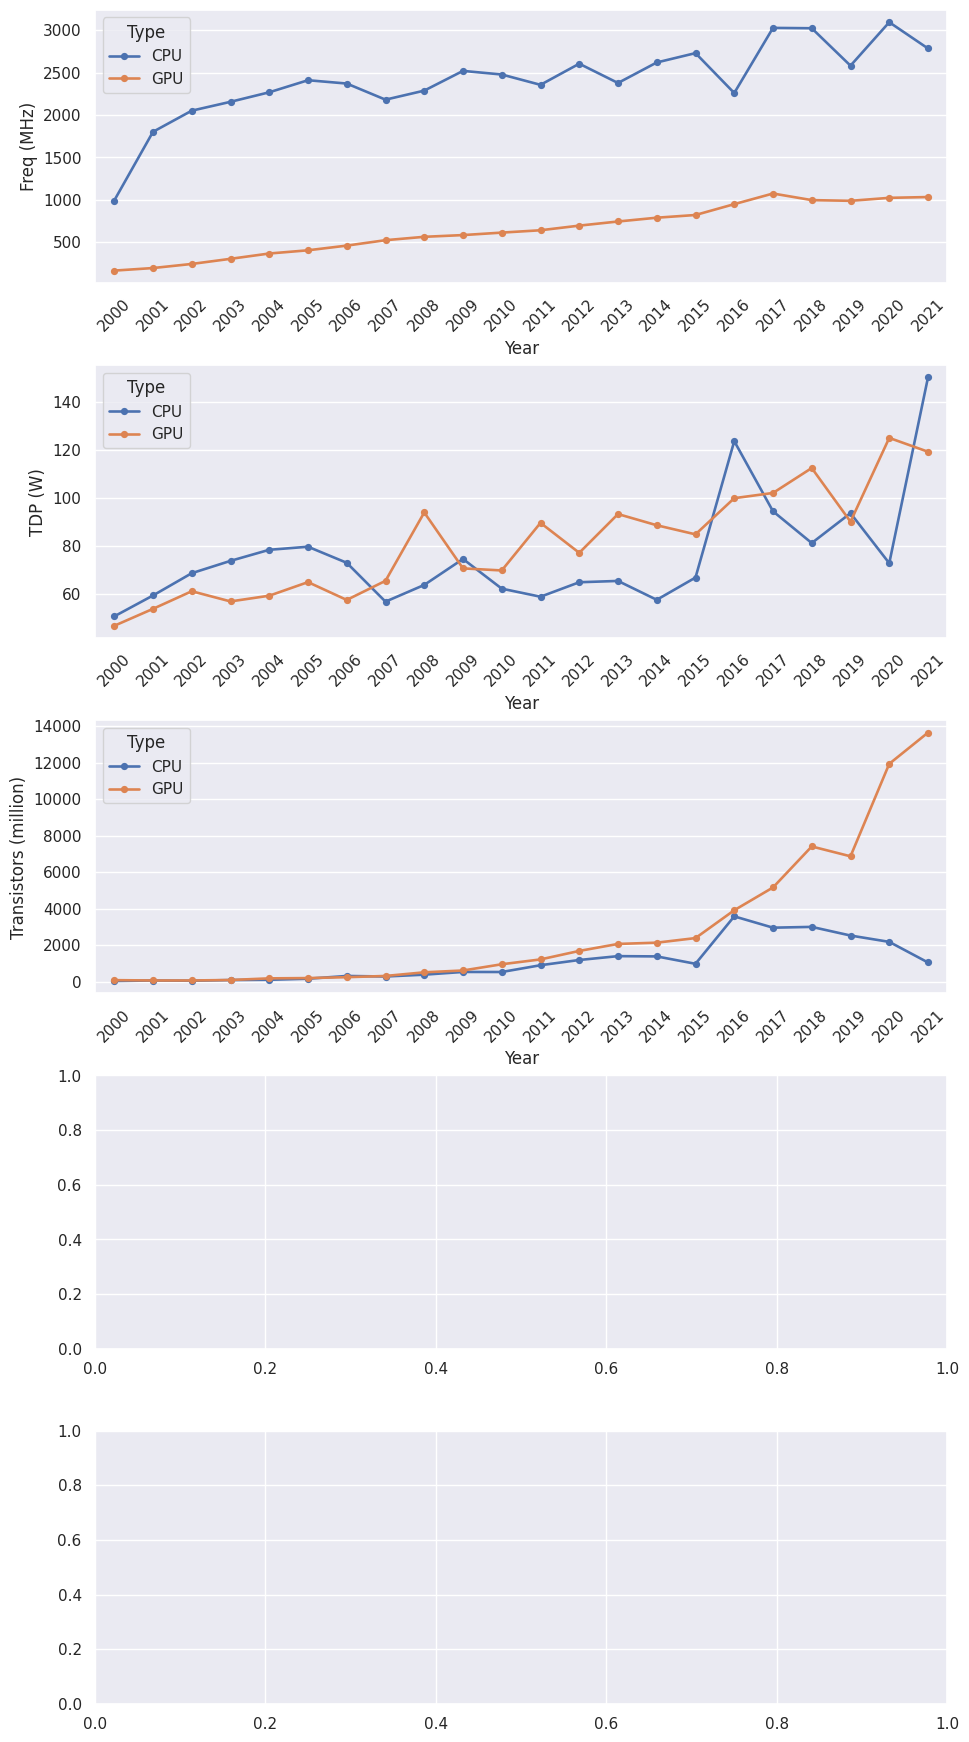

In [ ]:
with_year = chips.dropna(subset=['Year'])
with_year
# Plot Process Size
fig,ax =plt.subplots(nrows=5,figsize=(11,22),gridspec_kw={'hspace':0.3})

num_col = ['Freq (MHz)','TDP (W)','Transistors (million)']
for i,col in enumerate(num_col):
    sns.pointplot(x="Year", y=col, data=with_year,errorbar=None,ax=ax[i],hue="Type",scale=0.7)
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)
plt.show()

In [ ]:
GPU_perf

Type  Freq (MHz)
CPU   4400.0          1
      4700.0          1
      3733.0          1
      2830.0          1
      2276.0          1
                   ... 
GPU   450.0          85
      400.0          93
      600.0         108
      300.0         128
      500.0         131
Name: count, Length: 548, dtype: int64

##Process Size for Intel, AMD and Nvidia lies in comparatively lower range than for ATI and other vemdors

TSMC makes the highest number of chips in the world

In [ ]:
top_maker = chips.groupby('Foundry')['Type'].count().sort_values(ascending=False)



In [ ]:
top_maker

Foundry
TSMC       2178
Intel      1390
Unknown     866
GF          265
UMC          79
Samsung      60
Sony         10
IBM           3
NEC           2
Renesas       1
Name: Type, dtype: int64

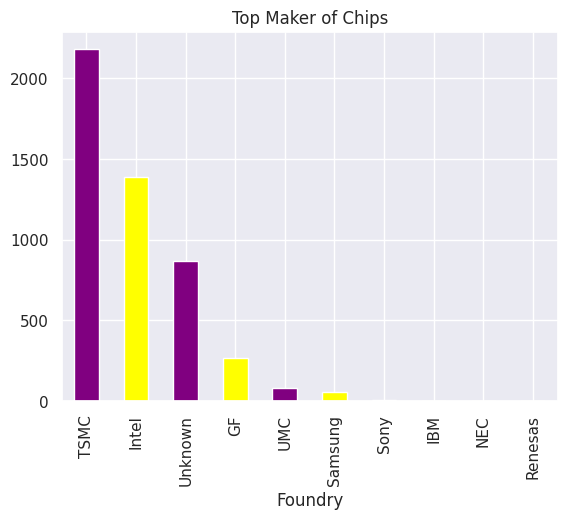

In [ ]:
top_maker=chips.groupby('Foundry')['Type'].count().sort_values(ascending=False).plot(kind='bar',orientation='vertical',title='Top Maker of Chips',color=['purple','yellow'])

Calculate and visualized the correlation among the features

In [ ]:
corr_chips= num_var.corr()

<Axes: >

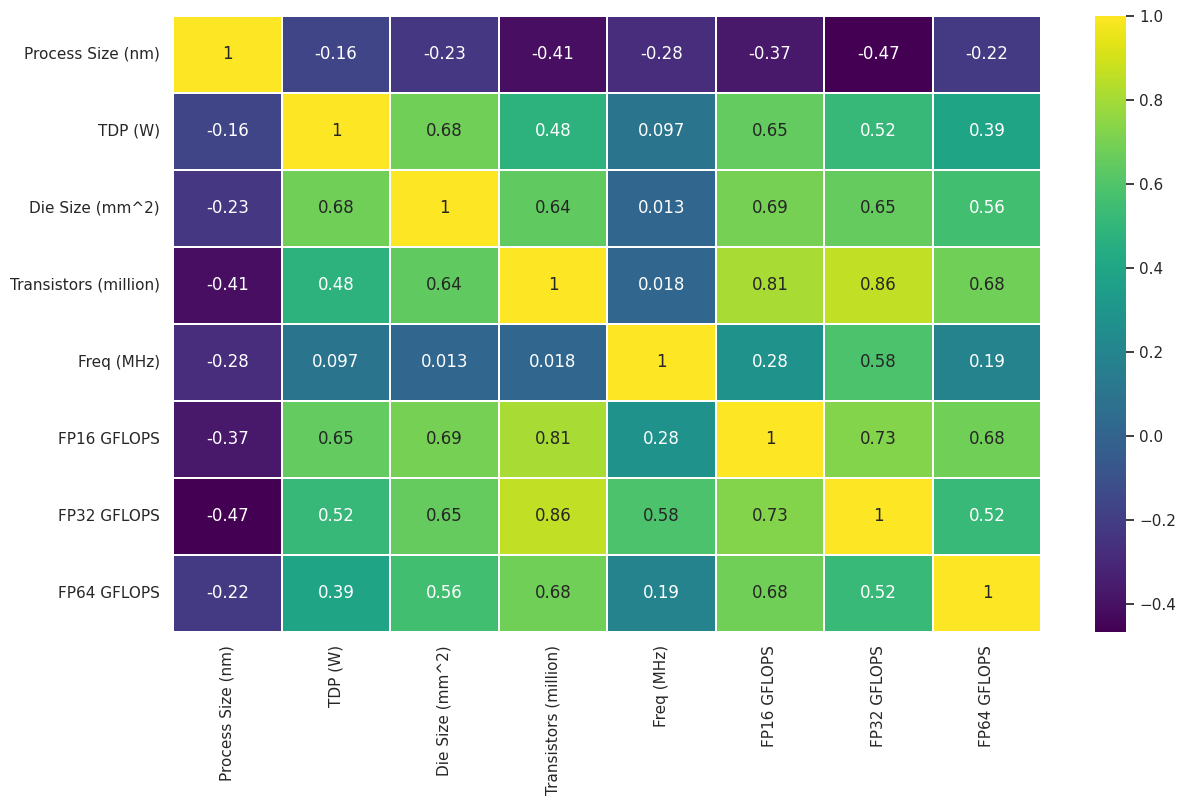

In [ ]:
#Plot sns.heatmap to show the correlation

fig, ax = plt.subplots(figsize=(14, 8))

sns.heatmap(corr_chips,annot=True,linewidths=.3,cmap='viridis')

## Correlation matters


##Perfom the correct encoding for your data, in readiness for modelling.

In [ ]:
#categorical values
#Encoding Data -One Hot for Categorical Variable

encoder = OneHotEncoder(sparse_output=False)


encoded_data = encoder.fit_transform(chips[['Product',	'Type',	'Release Date','Foundry',	'Vendor']])

In [ ]:
encoded_data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [ ]:
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['Product',	'Type',	'Release Date','Foundry',	'Vendor']))

In [ ]:
encoded_df

,Product_3dfx Spectre 1000,Product_3dfx Spectre 2000,Product_3dfx Spectre 3000,Product_3dfx Voodoo4 4000 AGP,Product_3dfx Voodoo4 4500 AGP,Product_3dfx Voodoo4 4500 PCI,Product_3dfx Voodoo4 4800 AGP,Product_3dfx Voodoo4-2 4000 AGP,Product_3dfx Voodoo4-2 4200 AGP,Product_3dfx Voodoo4-2 4200 PCI 16 MB,...,Foundry_Samsung,Foundry_Sony,Foundry_TSMC,Foundry_UMC,Foundry_Unknown,Vendor_AMD,Vendor_ATI,Vendor_Intel,Vendor_NVIDIA,Vendor_Other
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4850,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
